Griffin Shelor\
13-3-2024

# In-class Exercises: Matplotlib 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset as netcdf_dataset

### Q1. A set of (x, y) values are provided below. Plot the (x, y) values with x and y error bars, where the x-error is 0.1 and the y-error is 0.2 (constant for all data points). 

In [2]:
# use these values for the plot
x = np.arange(0.0, 3.1, 0.25)
y = np.exp(-x**2 / 2)

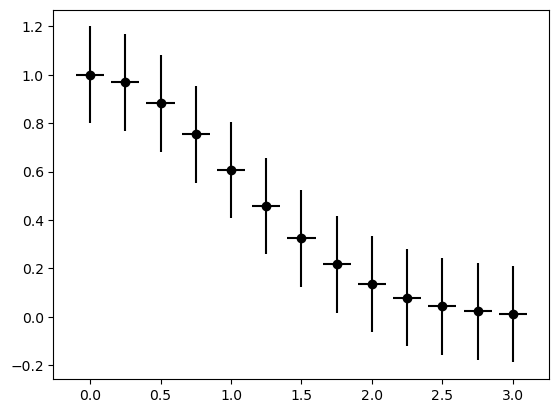

In [3]:
plt.errorbar(x, y, xerr = 0.1, yerr=0.2, fmt='ok');

### According to Indeed.com in January 2021, the top 10 programming languages with the most job postings were:
* Python – 70,000 jobs
* SQL – 69,000 jobs
* Java – 59,000 jobs
* R – 56,000 jobs
* VisualBasic – 54,000 jobs
* Javascript – 50,000 jobs
* C++ – 35,000 jobs
* C# – 28,000 jobs
* Objective C – 25,000 jobs
* Ruby – 13,000 jobs

### Q2. Make a `pie` chart showing these programming languages along with percentage of all posted jobs corresponding to each of the 10 languages. (For example, Python's 70,000 is about 15.3% of the total above). Make the `pie` big enough so you can see the details.

In [4]:
# data to plot in pie chart
labels = ['Python', 'SQL', 'Java', 'R', 'VisualBasic', 
          'Javascript', 'C++', 'C#', 'Objective C', 'Ruby']
jobs = np.array([70,69,59,56,54,50,35,28,25,13]) # in 1000s

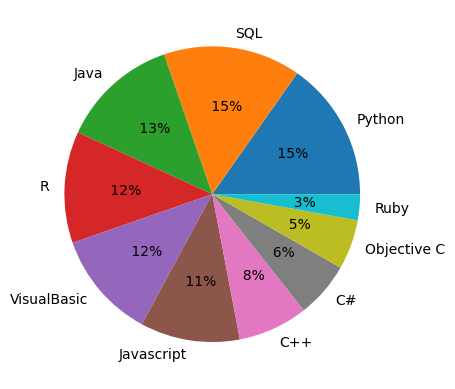

In [5]:
plt.pie(jobs, labels = labels, autopct='%3.0f%%');

### Q3. Import the file 'lecture13_grav.grd' which is a netcdf file with gravity (units = mgals) from the Chicxulub impact crater measured on a longitude / latitude grid. Display the variables.

Notice that this is the "2nd" format we covered in lecture.

In [6]:
# Import the data
grav_grid = netcdf_dataset('lecture13_grav.grd')
print(grav_grid.variables.keys())
print(grav_grid.dimensions)


dict_keys(['x_range', 'y_range', 'z_range', 'spacing', 'dimension', 'z'])
{'side': <class 'netCDF4._netCDF4.Dimension'>: name = 'side', size = 2, 'xysize': <class 'netCDF4._netCDF4.Dimension'>: name = 'xysize', size = 91056}


### Q4. Create x and y `arrays` from values found in 'x_range', 'y_range', and 'dimension'. Reverse the y `array` so its values are in decreasing order.

Follow our workflow from lecture for netcdf files in this format.

In [7]:
# Extract the variables into numpy arrays
x_rng = np.asarray(grav_grid.variables['x_range'])
y_rng = np.asarray(grav_grid.variables['y_range'])
dimension = np.asarray(grav_grid.variables['dimension'])

### Q5. Create the z array from values found in 'z' and 'dimension'. Reshape 'z' into a 2D `array`. 

Note: the number of rows should match the number of y-values, and the number of columns should match the number of x-values.

In [8]:
z = np.asarray(grav_grid.variables['z'])
z2 = z.reshape(dimension[1], dimension[0])

### Q6. Plot the grid using `contourf`. Add a `colorbar`, and label x and y axes and the `colorbar`. If you created your arrays correctly, your plot should look something like this (though possibly smaller and with a different colormap).

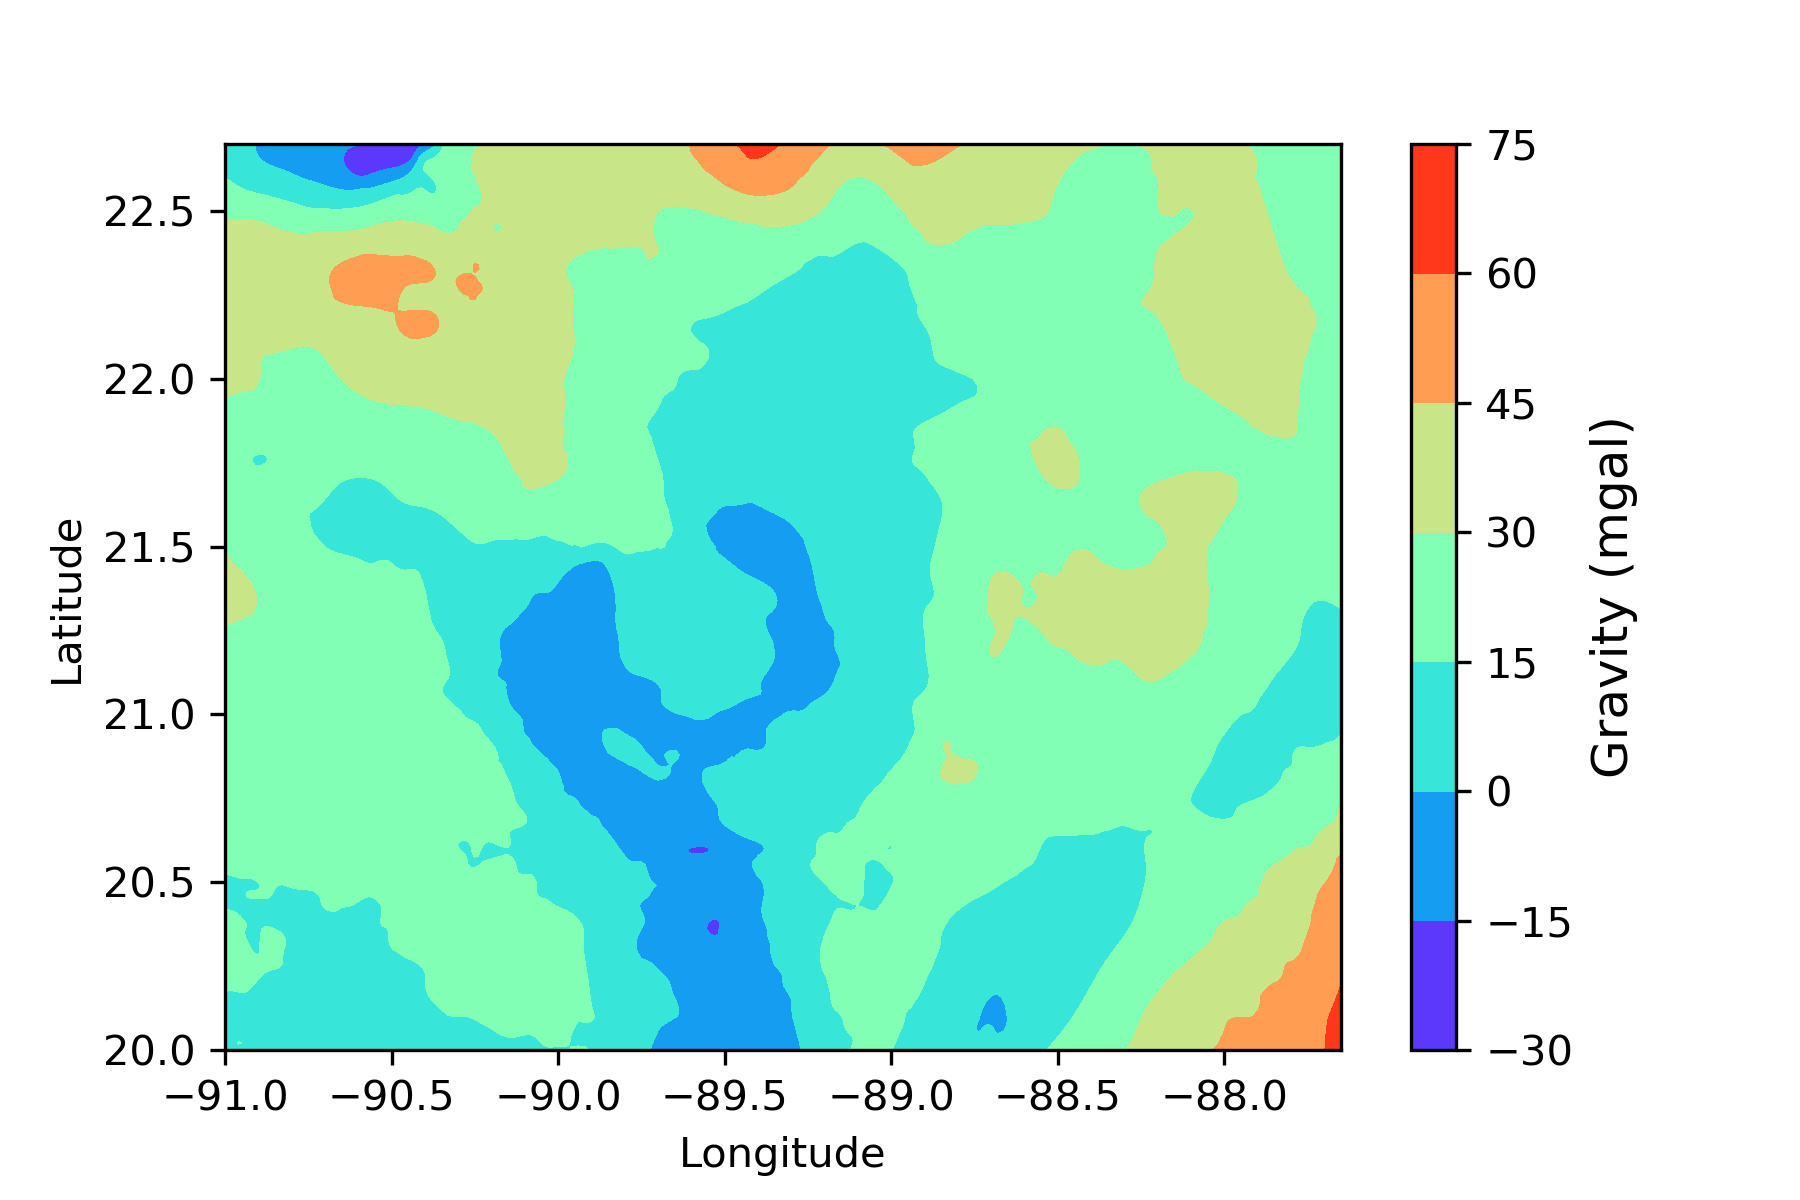

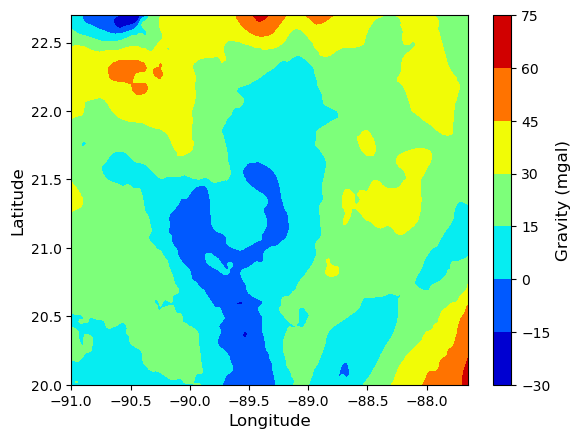

In [9]:
x_rng2 = np.linspace(x_rng[0], x_rng[1], dimension[0])
y_rng2 = np.linspace(y_rng[1], y_rng[0], dimension[1])

# Filled contour plot
plt.contourf(x_rng2, y_rng2, z2, cmap='jet')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar();
cb.set_label('Gravity (mgal)', fontsize=12)

### Q7. Plot the grid using `imshow`. Make sure the orientation and axes labels are correct, and add a `colorbar` with a label. Use a different color map than Q6.

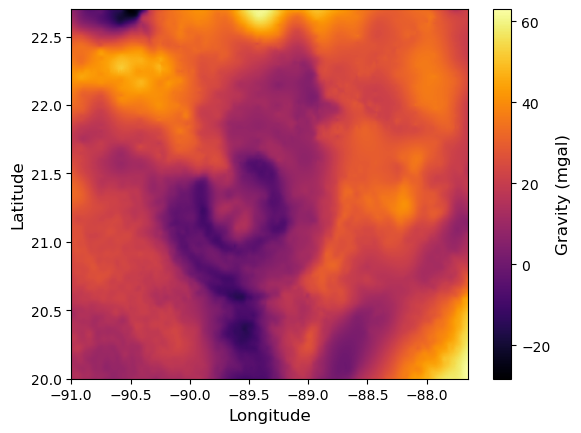

In [10]:
# An imshow plot
xmin2 = np.min(x_rng2)
xmax2 = np.max(x_rng2)
ymin2 = np.min(y_rng2)
ymax2 = np.max(y_rng2)
plt.imshow(z2, cmap='inferno', aspect='auto',
           extent = [xmin2, xmax2, ymin2, ymax2],)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
cb = plt.colorbar();
cb.set_label('Gravity (mgal)', fontsize=12)

### Save your notebook and output an html version. To receive credit for this in-class exercise upload both the .html and .ipynb files.